In [1]:
pip install scikit-learn

In [2]:
from google.colab import files
uploaded = files.upload()


Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [22]:
import pandas as pd
import numpy as np
df = pd.read_csv('loan_approval_dataset.csv')
print(df)



      loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_t

In [23]:
print(df.isnull().sum())

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [24]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [25]:
df.columns = df.columns.str.strip()

In [26]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [27]:
df['education'] = df['education'].str.strip().str.lower().map({'graduate': 0, 'not graduate': 1})
df['self_employed'] = df['self_employed'].str.strip().str.lower().map({'yes': 0, 'no': 1})

In [28]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,1,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,1,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,1,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,0,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,1,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,1,1,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,1,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [29]:
df.columns


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [30]:
X = df[[ 'education', 'self_employed', 'loan_amount', 'loan_term', 'cibil_score', 'bank_asset_value']]
y = df['loan_status']


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [33]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9672131147540983
Classification Report:
               precision    recall  f1-score   support

    Approved       0.97      0.98      0.97       536
    Rejected       0.96      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.96       854
weighted avg       0.97      0.97      0.97       854



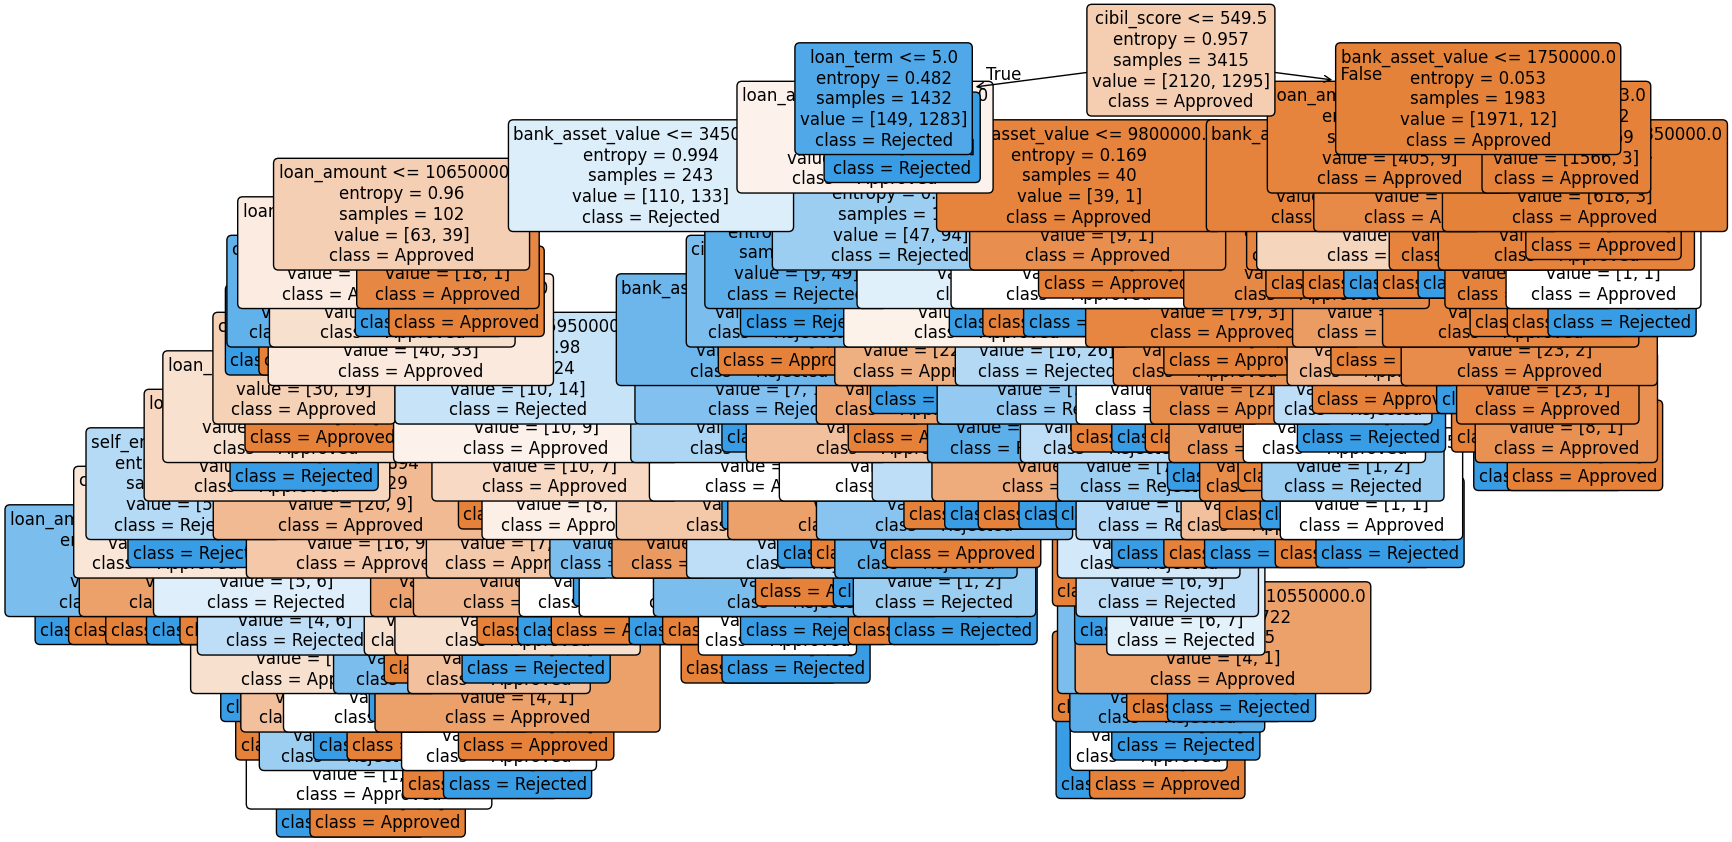

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Make the figure big for clarity
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Approved', 'Rejected'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()
